Istanbul Sehir University |
Spring 2017 |
CS240 Exploratary Data Analysis |
Final Project |
Amer Nour Eddin |
213171245

In [1]:
%matplotlib inline
from __future__ import print_function, division
from scipy import stats
import pandas as pd
import numpy as np
import random
import matplotlib
import thinkstats2
import thinkplot

In [2]:
#Reading the csv files and convert to pandas DF
Players = pd.read_csv('Master.csv') 
Salaries = pd.read_csv('Salaries.csv')

In [3]:
#cleaning and filtering
FilteredPlayers = Players.drop(['birthYear','birthDay','birthCountry','birthState', 'birthCity',
              'birthMonth','deathYear','deathMonth','deathDay','deathCountry',
              'deathState','deathCity','nameGiven','bats','throws','debut',
              'finalGame','retroID','bbrefID'],axis=1).dropna()
FilteredSalaries = Salaries.drop(['teamID', 'lgID', ],axis=1).dropna()

In [4]:
FilteredPlayers

,playerID,nameFirst,nameLast,weight,height
0,aardsda01,David,Aardsma,215.0,75.0
1,aaronha01,Hank,Aaron,180.0,72.0
2,aaronto01,Tommie,Aaron,190.0,75.0
3,aasedo01,Don,Aase,190.0,75.0
4,abadan01,Andy,Abad,184.0,73.0
5,abadfe01,Fernando,Abad,220.0,73.0
6,abadijo01,John,Abadie,192.0,72.0
7,abbated01,Ed,Abbaticchio,170.0,71.0
8,abbeybe01,Bert,Abbey,175.0,71.0
9,abbeych01,Charlie,Abbey,169.0,68.0


In [5]:
FilteredSalaries

,yearID,playerID,salary
0,1985,barkele01,870000
1,1985,bedrost01,550000
2,1985,benedbr01,545000
3,1985,campri01,633333
4,1985,ceronri01,625000
5,1985,chambch01,800000
6,1985,dedmoje01,150000
7,1985,forstte01,483333
8,1985,garbege01,772000
9,1985,harpete01,250000


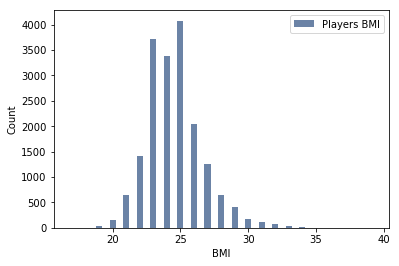

In [6]:
# Computing the BMI value for each player and add it to the Players dataframe
FilteredPlayers['BMI'] = (FilteredPlayers['weight']*703/FilteredPlayers['height']**2).astype(int)

# #BMI VALUES ABOVE 26
# Above26 = FilteredPlayers[FilteredPlayers.BMI >26.0]
# #BMI VALUES BELOW 26
# Below26 = FilteredPlayers[FilteredPlayers.BMI <26.0]

#plotting the histogram for the BMI values for all players
hist = thinkstats2.Hist(FilteredPlayers.BMI, label='Players BMI')
thinkplot.Hist(hist, width = 0.45)
thinkplot.Config(xlabel='BMI', ylabel='Count')

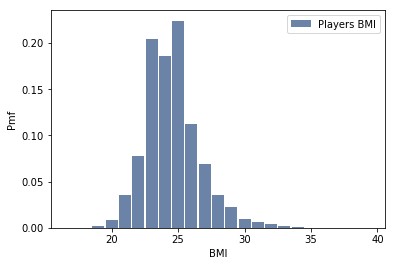

In [7]:
#plotting PMF probability mass function
pmf1 = thinkstats2.Pmf(FilteredPlayers.BMI, label='Players BMI')
thinkplot.Hist(pmf1)
thinkplot.Config(xlabel='BMI', ylabel='Pmf')

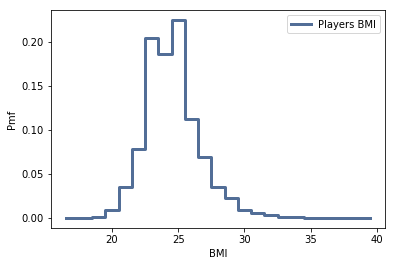

In [8]:
thinkplot.Pmf(pmf1)
thinkplot.Config(xlabel='BMI', ylabel='Pmf')

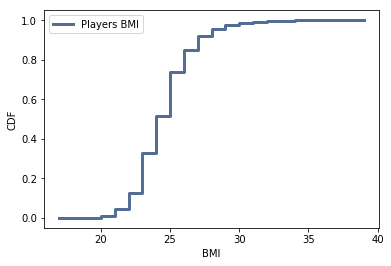

In [9]:
#plotting the CDF 
cdf = thinkstats2.Cdf(FilteredPlayers.BMI, label='Players BMI')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='BMI', ylabel='CDF', loc='upper left')

In [10]:
bmi = FilteredPlayers.BMI.dropna()
bmi

0        26
1        24
2        23
3        23
4        24
5        29
6        26
7        23
8        24
9        25
10       26
11       25
12       23
13       24
14       24
15       25
16       24
17       23
18       23
19       25
21       26
22       27
23       24
24       26
25       26
26       23
27       27
28       25
29       25
30       25
         ..
19075    28
19076    24
19077    28
19078    25
19079    22
19080    22
19081    24
19082    26
19083    24
19084    25
19085    24
19086    26
19087    26
19088    25
19089    24
19090    26
19091    25
19092    25
19093    23
19094    25
19095    25
19096    26
19097    26
19098    28
19099    26
19100    25
19101    23
19102    23
19103    25
19104    23
Name: BMI, dtype: int32

Mean, Var 24.5332249201 3.54447172292
Sigma 1.88267674414


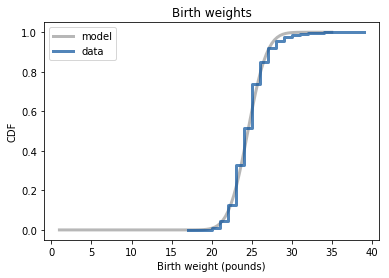

In [11]:
#Modeling
#Normal distirbution 
mu, var = thinkstats2.TrimmedMeanVar(bmi, p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=1, high=35)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(bmi, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Birth weights',
                 xlabel='Birth weight (pounds)',
                 ylabel='CDF')

In [12]:
FilteredSalaries

,yearID,playerID,salary
0,1985,barkele01,870000
1,1985,bedrost01,550000
2,1985,benedbr01,545000
3,1985,campri01,633333
4,1985,ceronri01,625000
5,1985,chambch01,800000
6,1985,dedmoje01,150000
7,1985,forstte01,483333
8,1985,garbege01,772000
9,1985,harpete01,250000


In [13]:
g = FilteredSalaries.groupby('playerID').salary

averageSalaryPerID = pd.DataFrame(g.mean())
g.mean()

playerID
aardsda01     1322821
aasedo01       575000
abadan01       327000
abadfe01       753280
abbotje01      246250
abbotji01     1440055
abbotku01      470777
abbotky01      129500
abbotpa01      924428
abercre01      327000
abernbr01      257500
abnersh01      144700
abreubo01     7773729
abreujo02     9110889
abreuto01      510750
accarje01      654880
aceveal01     1428550
acevejo01      286500
aceveju01      467071
ackerji01      426500
ackledu01     2460000
acostma01      633750
acrema01       133500
adamecr01      509500
adamsau01      507700
adamsda02      540000
adamsjo02      180500
adamsma01      797500
adamsmi03     2954400
adamsru01      329500
               ...   
youngke01     2607181
youngma01      894190
youngma02      414000
youngmi01      280700
youngmi02     7789116
yountro01     1966666
zagurmi01      396250
zahnge01       550000
zambrca01    11495000
zambred01      112000
zambrvi01     1073333
zaungr01      1187266
zeileto01     2547999
zerbech01      317000
z

In [14]:
# merging the playrs and salaries dataframes
new_df = pd.merge(FilteredSalaries, FilteredPlayers)

# Each player with his AVERAGE salary through the years and his BMI
g = new_df.groupby('playerID',as_index=False)["salary","BMI","nameFirst","nameLast"].mean().sort_values(by='salary', ascending=[False])
g

,playerID,salary,BMI
4554,tanakma01,22000000,26
3972,rodrial01,18109829,28
2148,howarry01,15525500,30
4582,teixema01,15305357,28
2294,jeterde01,13927268,24
1443,fieldpr01,13901318,38
4101,sabatcc01,13831632,34
694,cabremi01,13457901,29
2930,mauerjo01,13232692,26
834,cespeyo01,13165609,31


In [15]:
# Each BMI value and the average salaries for the players with this BMI value (sorted)
g2 = g.groupby('BMI', as_index=False)["salary"].sum().sort_values(by='BMI')
g2

,BMI,salary
0,19,7152446
1,20,32780902
2,21,113800099
3,22,153542194
4,23,622286125
5,24,687855838
6,25,925627087
7,26,1024378144
8,27,887092366
9,28,595942364


In [16]:
g2["salary"]

0        7152446
1       32780902
2      113800099
3      153542194
4      622286125
5      687855838
6      925627087
7     1024378144
8      887092366
9      595942364
10     534543666
11     215715466
12     126242736
13      65738481
14      40616775
15      35553638
16      12940356
17        900000
18       3771714
19      13901318
20       5723888
Name: salary, dtype: int64

In [17]:
BMIs = pd.Series(g2.BMI)

# Here are the mean and standard deviation of the players BMI values
mean, std = BMIs.mean(), BMIs.std()

mean, std


(29.0, 6.2048368229954285)

In [18]:
#NormalPdf returns a Pdf object that represents the normal distribution with the given parameters.
pdf = thinkstats2.NormalPdf(mean, std)

#Density returns a probability density, which doesn't mean much by itself.

pdf.Density(mean + std)


0.038997113287876944

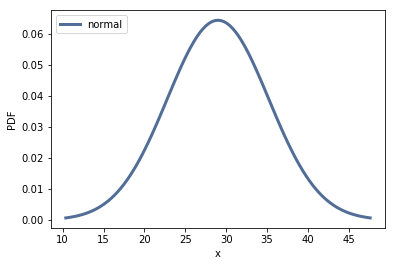

In [19]:
# Plotting the PDF with normal distirbution 
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

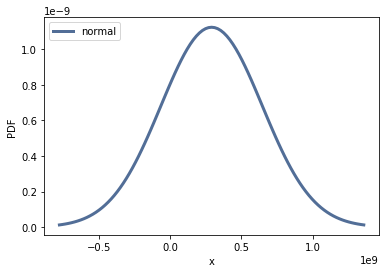

In [22]:
# doing the same for all the average salary for each player categorized with respect to his bmi
salaries = pd.Series(g2.salary)

mean, std = salaries.mean(), salaries.std()

pdf = thinkstats2.NormalPdf(mean, std)
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')


[4234 4276 2439 ..., 2155 2687 1690]


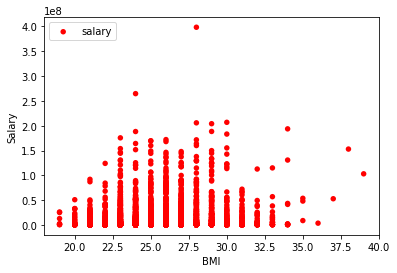

In [24]:
# Plotting the BMI values with the Salaries as a scatter plot to show the coorolation


# this function will get a random sample for a given dataframe
def SampleRows(df, nrows, replace=False):
    # replace = same row could be chosen more than one or not
    indices = np.random.choice(df.index, nrows, replace=replace)
    print(indices)
    sample = df.loc[indices]
    return sample

gscatter = new_df.groupby('playerID')["salary","BMI","nameFirst","nameLast"].apply(lambda x: x)#.sort_values(by='salary', ascending=[False])
dff = gscatter.groupby(["nameFirst","nameLast","BMI"],as_index=False).sum()
# dff
# the previous data frame returns all the players with their first and last names and their respective BMI values and salaries.

sample = SampleRows(dff, 5000)

bmi, salary = sample.BMI, sample.salary

# sample


thinkplot.Scatter(bmi, salary, alpha=1.0,color='red')
thinkplot.Config(xlabel='BMI',
                 ylabel='Salary'
               )

#  axis=[15, 40, 1000, 100000000]


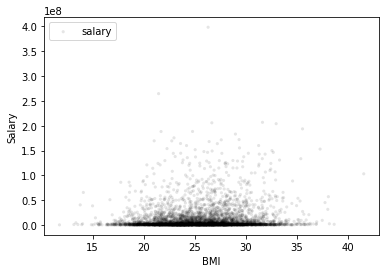

In [26]:
# Adding a little bit of noise to the data to form a better picture of the distirbution
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values


bmi = Jitter(bmi, 2)
salary = Jitter(salary, 2)


thinkplot.Scatter(bmi, salary, alpha=0.1, s=10,color='black')
thinkplot.Config(xlabel='BMI',
                 ylabel='Salary')

In [27]:
"""
I will use another method to find the corrolation which is by
using the covariance and The coefficient of correlation which is a standardized version of covariance
"""
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr
Corr(bmi, salary)


0.092437359055572363

In [29]:
"""
Implementing Hypothesis testing for our situation
"""

# this is the hypothesis testing methods provided by thinkstat2 library 

class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [30]:

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [32]:
"""
preparing the data:
(BMI value for each player, his average salary)
"""

# getting the salary values from the previous dataframes


Above26DF = dff[dff.BMI >26].sort_values(['salary'], ascending=False) #data frame contains all players with bmi ABOVE 26 and their salary
Below26DF = dff[dff.BMI <26].sort_values(['salary'], ascending=False) #data frame contains all players with bmi BELOW 26 and their salary




# fff1 = Above26DF.groupby(["nameFirst","nameLast","BMI"],as_index=False).sum()
# fff2 = Below26DF.groupby(["nameFirst","nameLast","BMI"],as_index=False).sum()

sample1 = SampleRows(Above26DF, 300)
sample2 = SampleRows(Below26DF, 300)



data = sample1.salary.values, sample2.salary.values


# print(Above26DF)
# print(sample1.salary.count())

[3873 3692 2750 4332 3481 1653 4991 5035 4273  169 1737 3430 4199 4482 2495
 3373 3360   40  624 4540 2433    9  456 1830 3930 4528 3661 4565 3919 4093
 4305  478 1066 1043 3974 2752 3532  193   45 1566 1137 1526 1466 1685 2295
 4196 4245 3857 3072 1152   61 1188 2665 1530 4166 2498 2343  496 3701   75
  917 3511 2248  696 3245 3957   28 1534 1675 5031 1938 1520 5040  465 4020
 4184 4250  943 1723   62 3059  101  474  286 2227 4240 2659 1588 5092 4894
 2923 2972  834 2980  657 3223  679 4507 1280 3226 1957  491 3734 2361 4870
 2630 3562  785 3356 2974  732 1361 2420 2545 2616 1473   57 3182 3045 2685
 4070 4695 3184 3894  225  704 2405 1550 3509 4948  752 2757 2188  369 3384
 1546 4403  668  100  964 4752 1930 1937 3217 3138  343 2415  774 4370 3170
 3422 5102 2067 4767 3664 5082 3179  263 4363 1560 3365 3250 1067 4972 2210
  863 5119 2156  243 3368 1307 4601 3080  887 1022  983  680 1423  934 2857
 3884 1313 5087  419 3745 4551 3517 2775 1677 4542 3649 4884 4999 4724 2131
 3455 3755  

In [34]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

# """
# the p value is too small so the null hypothesis is rejected
# """

0.0

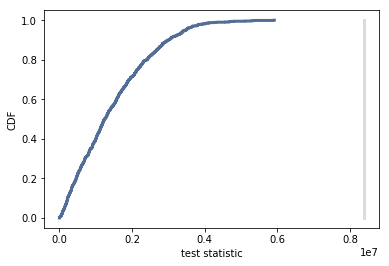

In [35]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [37]:
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat
    
    
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

# """
# also the hypothesis is not significantly effective
# so both cases are unrelated
# """

0.0

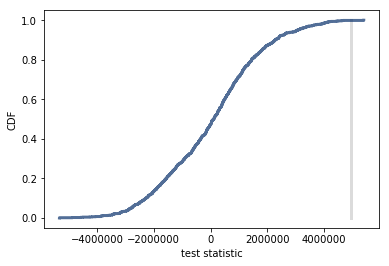

In [30]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

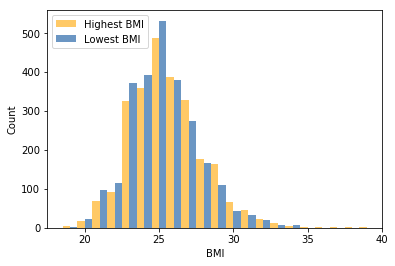

In [31]:
"""
Testing the corrolation
I will affirm that the hypothesis that I made is not true:
I will sort all the salaries by ascending order and I will cut them in halves 
(the x highest and x lowest) and I will look at the BMI values for the hieghest salaries
and take plot its histogram, also I will look at the BMI values for the lowest salaries and plot its histogram also, 
to see IF THE HIGHEST SALARIES HAS A SPECIAL DESTIRBUTION FOR THE BMI VALUES.
"""

highestSalaries = dff.sort_values(['salary'], ascending=False).reset_index(drop=True).loc[:2569]
lowestSalaries = dff.sort_values(['salary'], ascending=False).reset_index(drop=True).loc[2570:]


thinkplot.PrePlot(2)
hist1 = thinkstats2.Hist(highestSalaries.BMI, label='Highest BMI')
hist2 = thinkstats2.Hist(lowestSalaries.BMI, label='Lowest BMI')
thinkplot.Hist(hist1, width = 0.50,align='right',color='orange')
thinkplot.Hist(hist2, width = 0.50,align='left')
thinkplot.Config(xlabel='BMI', ylabel='Count')


In [ ]:
"""
As we can see from the previous plot that there is no significant difference 
between the bmi values for the highest and the lowest salaries.

so there is no relation between bmi and salary that may cause the salary to increase.
"""